In [2]:
import single_head
import multi_head
import copy
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage.morphology import binary_fill_holes
import sys
import pickle
np.set_printoptions(threshold=sys.maxsize)
from scipy.signal import detrend
import matplotlib.gridspec as gridspec

%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [9]:
Sequence=1

In [10]:
all_heads=[single_head.SingleHead.load_from_pickle(Sequence,i) for i in range (1,16)]

In [13]:
# make head from first to last
def make_mhead(all_heads, first, last):
    all_heads[first].reset_positions()
    all_heads[first].reset_colors()
    all_heads[first+1].reset_positions()
    all_heads[first+1].reset_colors()   
    heads = multi_head.MultiHead.joined_heads(all_heads[first], all_heads[first+1])
    heads.links.append(multi_head.Link(left=all_heads[first+1].frame_id,right=all_heads[first].frame_id))
    for i in range(first+2,last+1):
        heads.links.append(multi_head.Link(left=all_heads[i].frame_id,right=all_heads[i-1].frame_id))
        all_heads[i].reset_positions()
        all_heads[i].reset_colors()
        heads.append(all_heads[i])        
        if i==last:
             heads.links.append(multi_head.Link(left=all_heads[first].frame_id,right=all_heads[i].frame_id))
    print ("completed")
    return heads
mhead = make_mhead(all_heads, 0, 14)
mhead.calc_keypoints()

completed


In [19]:
for seq in range (1,5):
    all_heads=[single_head.SingleHead.load_from_pickle(seq,i) for i in range (1,16)]
    mhead = make_mhead(all_heads, 0, 14)
    mhead.calc_keypoints()
    mhead.save()

completed
Saving Completed
completed
Saving Completed
completed
Saving Completed
completed
Saving Completed


In [3]:
mheads=[]
for seq in range(1,5):
    mhead = multi_head.MultiHead.load_from_pickle(seq)
    mheads.append(mhead)

In [5]:
mhead = multi_head.MultiHead.load_from_pickle(2)

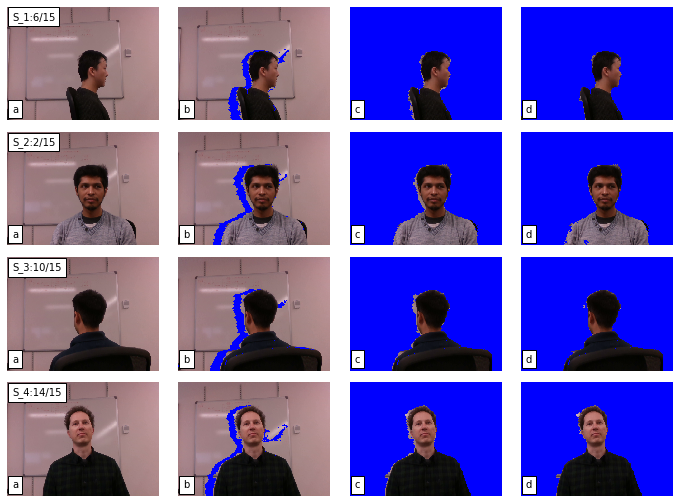

In [27]:
sequence_ids=[0,1,2,3]
head_ids=[5,1,9,13]
abcd="abcd"
nrows,ncols=4,4
screenwidth=12
plt.figure(figsize = (screenwidth,3/4*nrows*screenwidth/ncols))
gs1 = gridspec.GridSpec(nrows, ncols)
gs1.update(wspace=0.1, hspace=0.1)
for row in range(nrows):
    head = sequence_ids[row]
    head = sequence_ids[row]
    sequence= sequence_ids[row]
    head_idx=head_ids[row]
    for col in range(ncols):
#         print (sequence, head_idx, col)
        head=mheads[sequence].heads[head_idx]
        if col==0:
            img= head.twoD_image                        
        elif col==1:
            head.reset_filters()
            head.filter_nan()
            head.background_color=np.array([0,0,1])
            img= head.get_filtered_image()            
        elif col==2:
            head.reset_filters()
            head.filter_depth(1)
            head.background_color=np.array([0,0,1])
            img= head.get_filtered_image()
        elif col==3:
            head.remove_background_color()
            head.background_color=np.array([0,0,1])
            img= head.get_filtered_image()
        idx=ncols*row+col
        ax=plt.subplot(gs1[idx])
        ax.imshow(img)
        ax.set_axis_off()        
        if col==0:
            ax.text(x=20, y=20 , s=f"S_{sequence+1}:{head_idx+1}/15",horizontalalignment='left',
                                  verticalalignment='top',  bbox=dict(facecolor='white', alpha=1))        

        ax.text(x=20, y=453 , s=f"{abcd[col]}",horizontalalignment='left',
                              verticalalignment='bottom',  bbox=dict(facecolor='white', alpha=1))        
        
plt.savefig(f"2d_full_seq_{Sequence}")
plt.show()

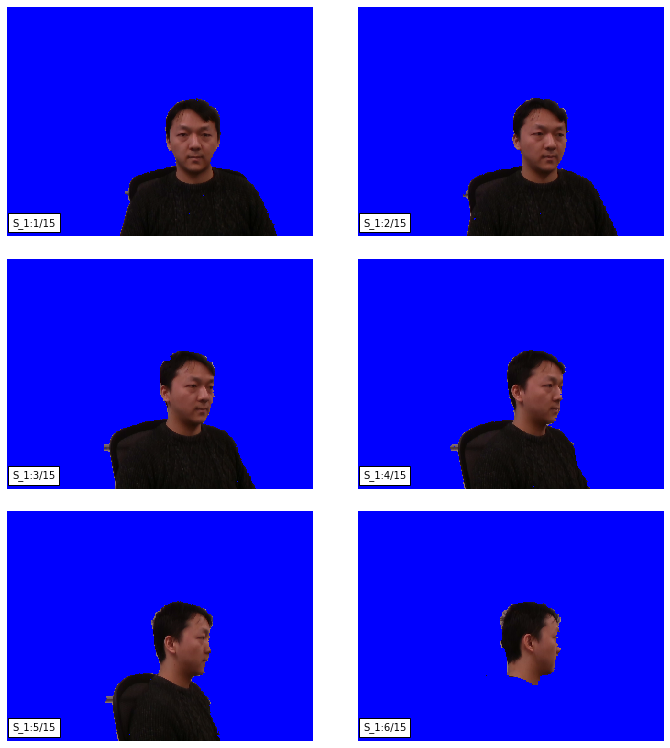

In [15]:
nrows,ncols=3,2
screenwidth=12
plt.figure(figsize = (screenwidth,3/4*nrows*screenwidth/ncols))
gs1 = gridspec.GridSpec(nrows, ncols)
gs1.update(wspace=0.1, hspace=0.1)
for row in range(nrows):
    for col in range(ncols):
        idx=ncols*row+col
        ax=plt.subplot(gs1[idx])
        mhead.heads[idx].background_color=np.array([0,0,1])
        img= mhead.heads[idx].get_filtered_image()
        ax.imshow(img)
        ax.set_axis_off()        
        ax.text(x=10, y=463 , s=f"S_{Sequence}:{idx+1}/15",horizontalalignment='left',
                              verticalalignment='bottom',  bbox=dict(facecolor='white', alpha=1))        
        del ax
plt.savefig(f"2d_filtered_seq_{Sequence}")
plt.show()